Dima Shulqa Speech Classification
https://github.com/shudima/notebooks/blob/master/Speech%20Classification.ipynb
 
Deep Learning with Python Chapter 5

Call Required Modules

In [1]:
import tensorflow
import os
import random as rn
import subprocess
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import time
import pickle
from keras import Input
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

Using TensorFlow backend.


Audio Files, Folder Path, and Padding

Initialize folder path, where there are 2.700 audio files, which divided by three classes (Karonese, Sundanese, and Tolakinese). Each class has 30 different chapters that will act as determining factor in training, validation, and testing data assignment. These audio files were extracted with two seconds length from bible audio files.

Audio variable lists will act as temporary audio store before assign them into training, validation, and testing data.

Padding variable will determine whether audio files processed without or with (zero) padding.

Per-Channel Energy Normalization: Why and How
Vincent Lostanlen, Justin Salamon, Mark Cartwright, Brian McFee, Andrew Farnsworth, Steve Kelling, and Juan Pablo Bello
Published November 2018

An alternative to the logarithmic transformation of the mel-frequency spectrogram (logmelspec), with the aim of improving robustness to channel distortion. PCEN combines dynamic range compression (DRC, also present in logmelspec) and adaptive gain control (AGC) with temporal integration.

In [2]:
DATA_DIR = './Dataset'

audio_mel_spectrograms = []
audio_pcenmel_spectrograms = []
audio_labels = []
audio_chapters = []

pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

Original shape : (128, 87)
Without padding shape : (128, 80)
With padding shape : (128, 128)


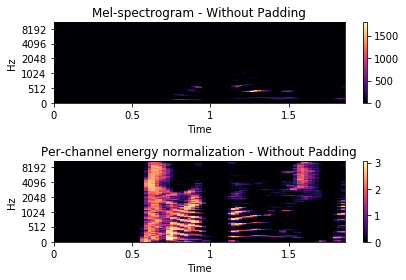

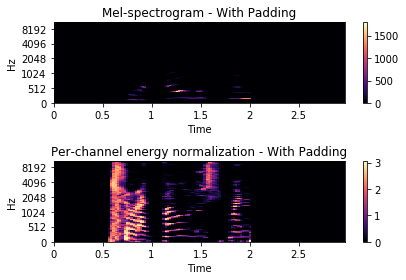

In [9]:
wav, sr = librosa.load(os.path.join(DATA_DIR, 'B10_01_Efesus_Karo_1.wav'))

mel_spectrogram = librosa.feature.melspectrogram(wav)
padded_mel_spectrogram = pad2d(mel_spectrogram,80)
padded_mel_spectrogram2 = pad2d(mel_spectrogram,128)

pcenmel_spectrogram = librosa.pcen(mel_spectrogram)
padded_pcenmel_spectrogram = pad2d(pcenmel_spectrogram,80)
padded_pcenmel_spectrogram2 = pad2d(pcenmel_spectrogram,128)

print("Original shape :", mel_spectrogram.shape)
print("Without padding shape :", padded_mel_spectrogram.shape)
print("With padding shape :",padded_mel_spectrogram2.shape)

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(padded_mel_spectrogram, x_axis='time', y_axis='mel')
plt.title('Mel-spectrogram - Without Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(padded_pcenmel_spectrogram, x_axis='time', y_axis='mel')
plt.title('Per-channel energy normalization - Without Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(padded_mel_spectrogram2, x_axis='time', y_axis='mel')
plt.title('Mel-spectrogram - With Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(padded_pcenmel_spectrogram2, x_axis='time', y_axis='mel')
plt.title('Per-channel energy normalization - With Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

Process Spectrogram Data to Audio File

Process mel scaled spectrogram and per channel energy normalization for mel scaled spectrogram.

In [60]:
count = 0
start = time.time()
for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname:
            continue
        struct = fname.split('_')
        chapter = struct[2] + '_' + struct[1] 
        language = struct[3]
        wav, sr = librosa.load(os.path.join(DATA_DIR, fname))

        mel_spectrogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectrogram,80)
        
        pcenmel_spectrogram = librosa.pcen(mel_spectrogram)
        padded_pcenmel_spectrogram = pad2d(pcenmel_spectrogram,80)

        audio_mel_spectrograms.append(padded_mel_spectrogram)
        audio_pcenmel_spectrograms.append(padded_pcenmel_spectrogram)
        audio_labels.append(language)
        audio_chapters.append(chapter)
        
        print("File", count+1, "done!")
        count = count + 1
    except Exception as e:
        print(fname, e)
        raise
end = time.time()
print(end-start)

File 1 done!
File 2 done!
File 3 done!
File 4 done!
File 5 done!
File 6 done!
File 7 done!
File 8 done!
File 9 done!
File 10 done!
File 11 done!
File 12 done!
File 13 done!
File 14 done!
File 15 done!
File 16 done!
File 17 done!
File 18 done!
File 19 done!
File 20 done!
File 21 done!
File 22 done!
File 23 done!
File 24 done!
File 25 done!
File 26 done!
File 27 done!
File 28 done!
File 29 done!
File 30 done!
File 31 done!
File 32 done!
File 33 done!
File 34 done!
File 35 done!
File 36 done!
File 37 done!
File 38 done!
File 39 done!
File 40 done!
File 41 done!
File 42 done!
File 43 done!
File 44 done!
File 45 done!
File 46 done!
File 47 done!
File 48 done!
File 49 done!
File 50 done!
File 51 done!
File 52 done!
File 53 done!
File 54 done!
File 55 done!
File 56 done!
File 57 done!
File 58 done!
File 59 done!
File 60 done!
File 61 done!
File 62 done!
File 63 done!
File 64 done!
File 65 done!
File 66 done!
File 67 done!
File 68 done!
File 69 done!
File 70 done!
File 71 done!
File 72 done!
F

File 559 done!
File 560 done!
File 561 done!
File 562 done!
File 563 done!
File 564 done!
File 565 done!
File 566 done!
File 567 done!
File 568 done!
File 569 done!
File 570 done!
File 571 done!
File 572 done!
File 573 done!
File 574 done!
File 575 done!
File 576 done!
File 577 done!
File 578 done!
File 579 done!
File 580 done!
File 581 done!
File 582 done!
File 583 done!
File 584 done!
File 585 done!
File 586 done!
File 587 done!
File 588 done!
File 589 done!
File 590 done!
File 591 done!
File 592 done!
File 593 done!
File 594 done!
File 595 done!
File 596 done!
File 597 done!
File 598 done!
File 599 done!
File 600 done!
File 601 done!
File 602 done!
File 603 done!
File 604 done!
File 605 done!
File 606 done!
File 607 done!
File 608 done!
File 609 done!
File 610 done!
File 611 done!
File 612 done!
File 613 done!
File 614 done!
File 615 done!
File 616 done!
File 617 done!
File 618 done!
File 619 done!
File 620 done!
File 621 done!
File 622 done!
File 623 done!
File 624 done!
File 625 d

File 1104 done!
File 1105 done!
File 1106 done!
File 1107 done!
File 1108 done!
File 1109 done!
File 1110 done!
File 1111 done!
File 1112 done!
File 1113 done!
File 1114 done!
File 1115 done!
File 1116 done!
File 1117 done!
File 1118 done!
File 1119 done!
File 1120 done!
File 1121 done!
File 1122 done!
File 1123 done!
File 1124 done!
File 1125 done!
File 1126 done!
File 1127 done!
File 1128 done!
File 1129 done!
File 1130 done!
File 1131 done!
File 1132 done!
File 1133 done!
File 1134 done!
File 1135 done!
File 1136 done!
File 1137 done!
File 1138 done!
File 1139 done!
File 1140 done!
File 1141 done!
File 1142 done!
File 1143 done!
File 1144 done!
File 1145 done!
File 1146 done!
File 1147 done!
File 1148 done!
File 1149 done!
File 1150 done!
File 1151 done!
File 1152 done!
File 1153 done!
File 1154 done!
File 1155 done!
File 1156 done!
File 1157 done!
File 1158 done!
File 1159 done!
File 1160 done!
File 1161 done!
File 1162 done!
File 1163 done!
File 1164 done!
File 1165 done!
File 116

File 1630 done!
File 1631 done!
File 1632 done!
File 1633 done!
File 1634 done!
File 1635 done!
File 1636 done!
File 1637 done!
File 1638 done!
File 1639 done!
File 1640 done!
File 1641 done!
File 1642 done!
File 1643 done!
File 1644 done!
File 1645 done!
File 1646 done!
File 1647 done!
File 1648 done!
File 1649 done!
File 1650 done!
File 1651 done!
File 1652 done!
File 1653 done!
File 1654 done!
File 1655 done!
File 1656 done!
File 1657 done!
File 1658 done!
File 1659 done!
File 1660 done!
File 1661 done!
File 1662 done!
File 1663 done!
File 1664 done!
File 1665 done!
File 1666 done!
File 1667 done!
File 1668 done!
File 1669 done!
File 1670 done!
File 1671 done!
File 1672 done!
File 1673 done!
File 1674 done!
File 1675 done!
File 1676 done!
File 1677 done!
File 1678 done!
File 1679 done!
File 1680 done!
File 1681 done!
File 1682 done!
File 1683 done!
File 1684 done!
File 1685 done!
File 1686 done!
File 1687 done!
File 1688 done!
File 1689 done!
File 1690 done!
File 1691 done!
File 169

File 2149 done!
File 2150 done!
File 2151 done!
File 2152 done!
File 2153 done!
File 2154 done!
File 2155 done!
File 2156 done!
File 2157 done!
File 2158 done!
File 2159 done!
File 2160 done!
File 2161 done!
File 2162 done!
File 2163 done!
File 2164 done!
File 2165 done!
File 2166 done!
File 2167 done!
File 2168 done!
File 2169 done!
File 2170 done!
File 2171 done!
File 2172 done!
File 2173 done!
File 2174 done!
File 2175 done!
File 2176 done!
File 2177 done!
File 2178 done!
File 2179 done!
File 2180 done!
File 2181 done!
File 2182 done!
File 2183 done!
File 2184 done!
File 2185 done!
File 2186 done!
File 2187 done!
File 2188 done!
File 2189 done!
File 2190 done!
File 2191 done!
File 2192 done!
File 2193 done!
File 2194 done!
File 2195 done!
File 2196 done!
File 2197 done!
File 2198 done!
File 2199 done!
File 2200 done!
File 2201 done!
File 2202 done!
File 2203 done!
File 2204 done!
File 2205 done!
File 2206 done!
File 2207 done!
File 2208 done!
File 2209 done!
File 2210 done!
File 221

File 2662 done!
File 2663 done!
File 2664 done!
File 2665 done!
File 2666 done!
File 2667 done!
File 2668 done!
File 2669 done!
File 2670 done!
File 2671 done!
File 2672 done!
File 2673 done!
File 2674 done!
File 2675 done!
File 2676 done!
File 2677 done!
File 2678 done!
File 2679 done!
File 2680 done!
File 2681 done!
File 2682 done!
File 2683 done!
File 2684 done!
File 2685 done!
File 2686 done!
File 2687 done!
File 2688 done!
File 2689 done!
File 2690 done!
File 2691 done!
File 2692 done!
File 2693 done!
File 2694 done!
File 2695 done!
File 2696 done!
File 2697 done!
File 2698 done!
File 2699 done!
File 2700 done!
36.17181062698364


Save Spectrogram Audio File

In [61]:
with open('modeldata/audio_mel_spectrograms.data', 'wb') as fp:
    pickle.dump(audio_mel_spectrograms, fp)
fp.close()
with open('modeldata/audio_pcenmel_spectrograms.data', 'wb') as fp:
    pickle.dump(audio_pcenmel_spectrograms, fp)
fp.close()
with open('modeldata/audio_labels.data', 'wb') as fp:
    pickle.dump(audio_labels, fp)
fp.close()
with open('modeldata/audio_chapters.data', 'wb') as fp:
    pickle.dump(audio_chapters, fp)
fp.close()

Read Spectrogram Audio File

In [62]:
with open('modeldata/audio_mel_spectrograms.data', 'rb') as fp:
    audio_mel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/audio_pcenmel_spectrograms.data', 'rb') as fp:
    audio_pcenmel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/audio_labels.data', 'rb') as fp:
    audio_labels = pickle.load(fp)
fp.close()
with open('modeldata/audio_chapters.data', 'rb') as fp:
    audio_chapters = pickle.load(fp)
fp.close()

Initialize Train, Validation and Testing Variable - With Padding

In [18]:
val_mel_spectrograms = []
val_pcenmel_spectrograms = []
val_labels = []

test_mel_spectrograms = []
test_pcenmel_spectrograms = []
test_labels = []

train_mel_spectrograms = []
train_pcenmel_spectrograms = []
train_labels = []

Initialize Train, Validation and Testing Variable - Without Padding

In [25]:
val_mel_spectrograms2 = []
val_pcenmel_spectrograms2 = []
val_labels2 = []

test_mel_spectrograms2 = []
test_pcenmel_spectrograms2 = []
test_labels2 = []

train_mel_spectrograms2 = []
train_pcenmel_spectrograms2 = []
train_labels2 = []

Chapter Selection for Validation and Testing Data

Divided into 24 chapters for training data (2160 files), 3 chapters for validation data (270 files), and 3 chapters for testing data (270 files).

In [4]:
chapters = ['Matius_01', 'Matius_02', 'Markus_01', 'Markus_02', 'Lukas_01', 'Lukas_02', 'Yohanes_01', 'KisahRasul_01', 
            'Roma_01', '1Korintus_01', '2Korintus_01', 'Galatia_01', 'Efesus_01', 'Filipe_01', 'Kolose_01', '1Tesalonika_01',
            '2Tesalonika_01', '1Timotius_01', '2Timotius_01', 'Titus_01', 'Filemon_01', 'Ibrani_01', 'Yakobus_01', '1Petrus_01',
            '2Petrus_01', '1Yohanes_01', '2Yohanes_01', '3Yohanes_01', 'Yudas_01', 'Wahyu_01']

rn.seed(42)
not_train_chapters = rn.sample(chapters, 6)
validate_chapters = []
test_chapters = []
for i in range(len(not_train_chapters)):
    if i < 3:
        validate_chapters.append(not_train_chapters[i])
    else:
        test_chapters.append(not_train_chapters[i])

print("Validate Chapters: ", validate_chapters)
print("Test Chapters: ", test_chapters)

Validate Chapters:  ['Filemon_01', 'Markus_02', 'Matius_01']
Test Chapters:  ['1Petrus_01', 'Roma_01', 'KisahRasul_01']


Assign Train, Validation, and Testing Data

Set class into numbers for computational requirement and assign audio data to train, validation, and testing.

In [64]:
for i in range(len(audio_chapters)):
    if audio_labels[i] == 'Karo':
        audio_labels[i] = 0
    elif audio_labels[i] == 'Sunda':
        audio_labels[i] = 1
    elif audio_labels[i] == 'Tolaki':
        audio_labels[i] = 2
        
    if audio_chapters[i] in validate_chapters:
        val_mel_spectrograms.append(audio_mel_spectrograms[i])
        val_pcenmel_spectrograms.append(audio_pcenmel_spectrograms[i])
        val_labels.append(audio_labels[i])
    elif audio_chapters[i] in test_chapters:
        test_mel_spectrograms.append(audio_mel_spectrograms[i])
        test_pcenmel_spectrograms.append(audio_pcenmel_spectrograms[i])
        test_labels.append(audio_labels[i])
    else:
        train_mel_spectrograms.append(audio_mel_spectrograms[i])
        train_pcenmel_spectrograms.append(audio_pcenmel_spectrograms[i])
        train_labels.append(audio_labels[i])
        
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_pcenmel_spectrograms = np.array(train_pcenmel_spectrograms)
train_labels = to_categorical(np.array(train_labels))

val_mel_spectrograms = np.array(val_mel_spectrograms)
val_pcenmel_spectrograms = np.array(val_pcenmel_spectrograms)
val_labels = to_categorical(np.array(val_labels))

test_mel_spectrograms = np.array(test_mel_spectrograms)
test_pcenmel_spectrograms = np.array(test_pcenmel_spectrograms)
test_labels = to_categorical(np.array(test_labels))

Save Train, Validation, and Testing Data

In [65]:
with open('modeldata/train_mel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(train_mel_spectrograms, fp)
fp.close()
with open('modeldata/train_pcenmel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(train_pcenmel_spectrograms, fp)
fp.close()
with open('modeldata/train_labels_new2.data', 'wb') as fp:
    pickle.dump(train_labels, fp)
fp.close()

with open('modeldata/val_mel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(val_mel_spectrograms, fp)
fp.close()
with open('modeldata/val_pcenmel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(val_pcenmel_spectrograms, fp)
fp.close()
with open('modeldata/val_labels_new2.data', 'wb') as fp:
    pickle.dump(val_labels, fp)
fp.close()

with open('modeldata/test_mel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(test_mel_spectrograms, fp)
fp.close()
with open('modeldata/test_pcenmel_spectrograms_new2.data', 'wb') as fp:
    pickle.dump(test_pcenmel_spectrograms, fp)
fp.close()
with open('modeldata/test_labels_new2.data', 'wb') as fp:
    pickle.dump(test_labels, fp)
fp.close()

Read Train, Validation, and Testing Data - Without Padding

In [17]:
with open('modeldata/train_mel_spectrograms_new2.data', 'rb') as fp:
    train_mel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/train_pcenmel_spectrograms_new2.data', 'rb') as fp:
    train_pcenmel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/train_labels_new2.data', 'rb') as fp:
    train_labels2 = pickle.load(fp)
fp.close()

with open('modeldata/val_mel_spectrograms_new2.data', 'rb') as fp:
    val_mel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/val_pcenmel_spectrograms_new2.data', 'rb') as fp:
    val_pcenmel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/val_labels_new2.data', 'rb') as fp:
    val_labels2 = pickle.load(fp)
fp.close()

with open('modeldata/test_mel_spectrograms_new2.data', 'rb') as fp:
    test_mel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/test_pcenmel_spectrograms_new2.data', 'rb') as fp:
    test_pcenmel_spectrograms2 = pickle.load(fp)
fp.close()
with open('modeldata/test_labels_new2.data', 'rb') as fp:
    test_labels2 = pickle.load(fp)
fp.close()

Details - Without Padding

In [18]:
print('train_mel_spectrograms:', train_mel_spectrograms2.shape)
print('train_pcenmel_spectrograms:', train_pcenmel_spectrograms2.shape)
print('train_labels:', train_labels2.shape)
print()
print('val_mel_spectrograms:', val_mel_spectrograms2.shape)
print('val_pcenmel_spectrograms:', val_pcenmel_spectrograms2.shape)
print('val_labels:', val_labels2.shape)
print()
print('test_mel_spectrograms:', test_mel_spectrograms2.shape)
print('test_pcenmel_spectrograms:', test_pcenmel_spectrograms2.shape)
print('test_labels:', test_labels2.shape)

train_mel_spectrograms: (2160, 128, 80)
train_pcenmel_spectrograms: (2160, 128, 80)
train_labels: (2160, 3)

val_mel_spectrograms: (270, 128, 80)
val_pcenmel_spectrograms: (270, 128, 80)
val_labels: (270, 3)

test_mel_spectrograms: (270, 128, 80)
test_pcenmel_spectrograms: (270, 128, 80)
test_labels: (270, 3)


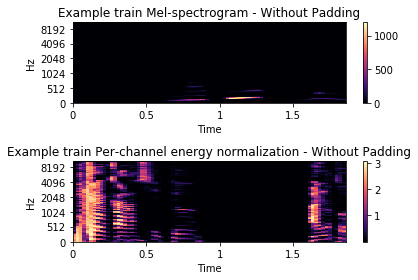

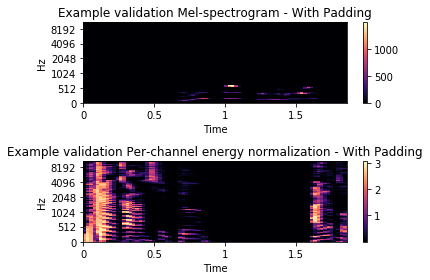

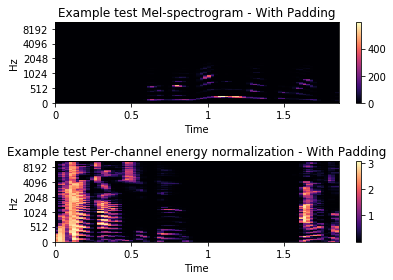

In [19]:
plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(train_mel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example train Mel-spectrogram - Without Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(train_pcenmel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example train Per-channel energy normalization - Without Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(val_mel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example validation Mel-spectrogram - Without Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(val_pcenmel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example validation Per-channel energy normalization - Without Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(test_mel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example test Mel-spectrogram - Without Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(test_pcenmel_spectrograms2[0], x_axis='time', y_axis='mel')
plt.title('Example test Per-channel energy normalization - Without Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

Initialize Mel-Spectrogram Training - Without Padding

Expand dimension for keras model training

In [28]:
train_melspec_ex2 = np.expand_dims(train_mel_spectrograms2, -1)
val_melspec_ex2 = np.expand_dims(val_mel_spectrograms2, -1)
print('train X shape:', train_melspec_ex2.shape)
print('val X shape:', val_melspec_ex2.shape)

train X shape: (2160, 128, 80, 1)
val X shape: (270, 128, 80, 1)


Initialize Mel-Spectrogram Model - Without Padding

In [29]:
ip = Input(shape=train_melspec_ex2[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(3, activation='softmax')(m)

melspec_model2 = Model(input=ip, output=op)

melspec_model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 80, 1)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 77, 64)       1088      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 19, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 19, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 37696)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1206304   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Training Mel-Spectrogram Model - Without Padding

In [30]:
melspec_model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

melspec_history2 = melspec_model2.fit(train_melspec_ex2,
          train_labels2,
          epochs=100,
          batch_size=36,
          verbose=1,
          validation_data=(val_melspec_ex2, val_labels2))

Train on 2160 samples, validate on 270 samples
Epoch 1/100
2160/2160 [==============================] - 12s 6ms/step - loss: 4.7040 - accuracy: 0.3380 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
2160/2160 [==============================] - 12s 6ms/step - loss: 1.0941 - accuracy: 0.3347 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 3/100
2160/2160 [==============================] - 12s 6ms/step - loss: 1.1085 - accuracy: 0.3764 - val_loss: 1.0906 - val_accuracy: 0.3630
Epoch 4/100
2160/2160 [==============================] - 12s 6ms/step - loss: 1.0711 - accuracy: 0.4190 - val_loss: 1.0975 - val_accuracy: 0.3407
Epoch 5/100
2160/2160 [==============================] - 12s 6ms/step - loss: 1.0340 - accuracy: 0.4593 - val_loss: 1.1008 - val_accuracy: 0.3667
Epoch 6/100
2160/2160 [==============================] - 12s 6ms/step - loss: 0.9518 - accuracy: 0.5176 - val_loss: 1.0302 - val_accuracy: 0.4704
Epoch 7/100
2160/2160 [==============================] - 13s 6ms/step - loss:

Saving Mel-Spectrogram Model - Without Padding

In [31]:
melspec_model2.save('modeldata/mel_spectrogram_model2.h5')

Plotting Mel-Spectrogram Model Result - Without Padding

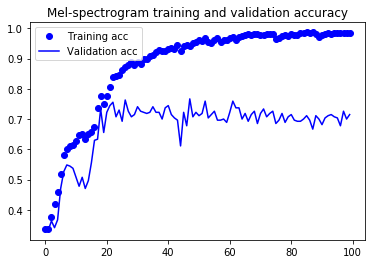

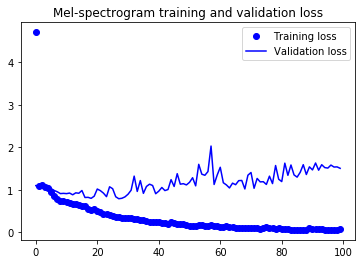

In [32]:
acc = melspec_history2.history['accuracy']
val_acc = melspec_history2.history['val_accuracy']
loss = melspec_history2.history['loss']
val_loss = melspec_history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Mel-spectrogram training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Mel-spectrogram training and validation loss')
plt.legend()

plt.show()

with open('modeldata/mel_spectrogram_history2', 'wb') as fp:
    pickle.dump(melspec_history2.history, fp)

Testing Mel-Spectogram Model - Without Padding

In [33]:
test_melspec_ex2 = np.expand_dims(test_mel_spectrograms2, -1)
test_loss, test_acc = melspec_model2.evaluate(test_melspec_ex2, test_labels2)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 2ms/step
2.106234139866299
0.6925926208496094


Initialize Per Channel Mel-Spectrogram Training - Without Padding

In [34]:
train_pcenmelspec_ex2 = np.expand_dims(train_pcenmel_spectrograms2, -1)
val_pcenmelspec_ex2 = np.expand_dims(val_pcenmel_spectrograms2, -1)
print('train X shape:', train_pcenmelspec_ex2.shape)
print('val X shape:', val_pcenmelspec_ex2.shape)

train X shape: (2160, 128, 80, 1)
val X shape: (270, 128, 80, 1)


Initialize Per Channel Mel-Spectrogram Model - Without Padding

In [35]:
ip = Input(shape=train_pcenmelspec_ex2[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(3, activation='softmax')(m)

pcenmelspec_model2 = Model(input=ip, output=op)

pcenmelspec_model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 80, 1)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 77, 64)       1088      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 19, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 19, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 37696)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1206304   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Training Per Channel Mel-Spectrogram Model - Without Padding

In [36]:
pcenmelspec_model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

pcenmelspec_history2 = pcenmelspec_model2.fit(train_pcenmelspec_ex2,
          train_labels2,
          epochs=100,
          batch_size=36,
          verbose=1,
          validation_data=(val_pcenmelspec_ex2, val_labels2))

Train on 2160 samples, validate on 270 samples
Epoch 1/100
2160/2160 [==============================] - 16s 7ms/step - loss: 1.1914 - accuracy: 0.3301 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
2160/2160 [==============================] - 15s 7ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/100
2160/2160 [==============================] - 15s 7ms/step - loss: 1.0987 - accuracy: 0.3185 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
2160/2160 [==============================] - 15s 7ms/step - loss: 1.0987 - accuracy: 0.3185 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/100
2160/2160 [==============================] - 14s 7ms/step - loss: 1.0987 - accuracy: 0.3157 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
2160/2160 [==============================] - 15s 7ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/100
2160/2160 [==============================] - 14s 7ms/step - loss:

Saving Per Channel Mel-Spectrogram Model - Without Padding

In [37]:
pcenmelspec_model2.save('modeldata/pcenmel_spectrogram_model2.h5')

Plotting Per Channel Mel-Spectrogram Model Result - Without Padding

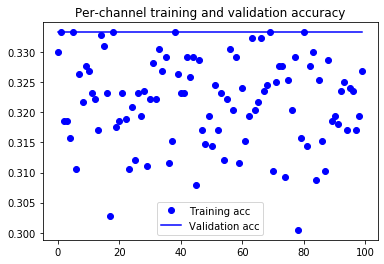

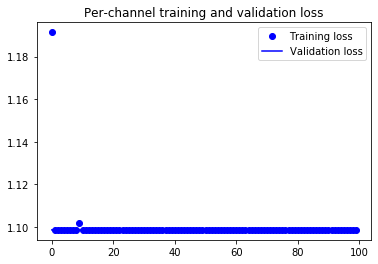

In [38]:
acc = pcenmelspec_history2.history['accuracy']
val_acc = pcenmelspec_history2.history['val_accuracy']
loss = pcenmelspec_history2.history['loss']
val_loss = pcenmelspec_history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Per-channel training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Per-channel training and validation loss')
plt.legend()

plt.show()

with open('modeldata/pcenmel_spectrogram_history2', 'wb') as fp:
    pickle.dump(pcenmelspec_history2.history, fp)

Testing Per Channel Mel-Spectogram Model - Without Padding

In [39]:
test_pcenmelspec_ex2 = np.expand_dims(test_pcenmel_spectrograms2, -1)
test_loss, test_acc = pcenmelspec_model2.evaluate(test_pcenmelspec_ex2, test_labels2)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 2ms/step
1.0986125460377445
0.3333333432674408


Zero-padding for cross-correlation, auto-correlation, or convolution filtering is used to not mix convolution results. 
The full result of a linear convolution is longer than either of the two input vectors. 
If we don't provide a place to put the end of this longer convolution result, the convolution will just mix it in with and cruft up the  desired result. 
Zero-padding provides a bunch zeros which into mix the longer result.

hotpaw2
https://dsp.stackexchange.com/questions/741/why-should-i-zero-pad-a-signal-before-taking-the-fourier-transform

Read Train, Validation, and Testing Data - With Padding

In [12]:
with open('modeldata/train_mel_spectrograms_new.data', 'rb') as fp:
    train_mel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/train_pcenmel_spectrograms_new.data', 'rb') as fp:
    train_pcenmel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/train_labels_new.data', 'rb') as fp:
    train_labels = pickle.load(fp)
fp.close()

with open('modeldata/val_mel_spectrograms_new.data', 'rb') as fp:
    val_mel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/val_pcenmel_spectrograms_new.data', 'rb') as fp:
    val_pcenmel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/val_labels_new.data', 'rb') as fp:
    val_labels = pickle.load(fp)
fp.close()

with open('modeldata/test_mel_spectrograms_new.data', 'rb') as fp:
    test_mel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/test_pcenmel_spectrograms_new.data', 'rb') as fp:
    test_pcenmel_spectrograms = pickle.load(fp)
fp.close()
with open('modeldata/test_labels_new.data', 'rb') as fp:
    test_labels = pickle.load(fp)
fp.close()

Details - With Padding

In [3]:
print('train_mel_spectrograms:', train_mel_spectrograms.shape)
print('train_pcenmel_spectrograms:', train_pcenmel_spectrograms.shape)
print('train_labels:', train_labels.shape)
print()
print('val_mel_spectrograms:', val_mel_spectrograms.shape)
print('val_pcenmel_spectrograms:', val_pcenmel_spectrograms.shape)
print('val_labels:', val_labels.shape)
print()
print('test_mel_spectrograms:', test_mel_spectrograms.shape)
print('test_pcenmel_spectrograms:', test_pcenmel_spectrograms.shape)
print('test_labels:', test_labels.shape)

train_mel_spectrograms: (2160, 128, 128)
train_pcenmel_spectrograms: (2160, 128, 128)
train_labels: (2160, 3)

val_mel_spectrograms: (270, 128, 128)
val_pcenmel_spectrograms: (270, 128, 128)
val_labels: (270, 3)

test_mel_spectrograms: (270, 128, 128)
test_pcenmel_spectrograms: (270, 128, 128)
test_labels: (270, 3)


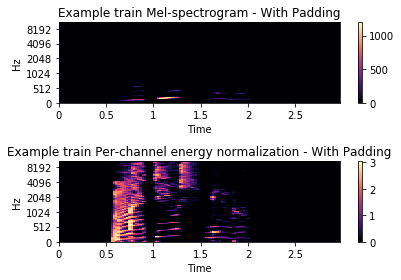

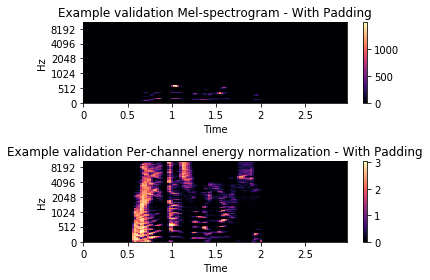

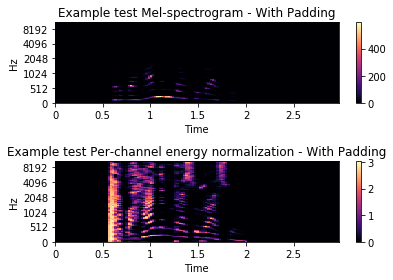

In [20]:
plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(train_mel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example train Mel-spectrogram - With Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(train_pcenmel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example train Per-channel energy normalization - With Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(val_mel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example validation Mel-spectrogram - With Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(val_pcenmel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example validation Per-channel energy normalization - With Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(test_mel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example test Mel-spectrogram - With Padding')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(test_pcenmel_spectrograms[0], x_axis='time', y_axis='mel')
plt.title('Example test Per-channel energy normalization - With Padding')
plt.colorbar()
plt.tight_layout()
plt.show()

Initialize Mel-Spectrogram Training - With Padding

In [21]:
train_melspec_ex = np.expand_dims(train_mel_spectrograms, -1)
val_melspec_ex = np.expand_dims(val_mel_spectrograms, -1)
print('train X shape:', train_melspec_ex.shape)
print('val X shape:', val_melspec_ex.shape)

train X shape: (2160, 128, 128, 1)
val X shape: (270, 128, 128, 1)


Initialize Mel-Spectrogram Model - With Padding

In [5]:
ip = Input(shape=train_melspec_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(3, activation='softmax')(m)

melspec_model = Model(input=ip, output=op)

melspec_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      1088      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1968160   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Training Mel-Spectrogram Model - With Padding

In [6]:
melspec_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

melspec_history = melspec_model.fit(train_melspec_ex,
          train_labels,
          epochs=100,
          batch_size=36,
          verbose=1,
          validation_data=(val_melspec_ex, val_labels))

Train on 2160 samples, validate on 270 samples
Epoch 1/100
2160/2160 [==============================] - 32s 15ms/step - loss: 16.0151 - accuracy: 0.4083 - val_loss: 1.0877 - val_accuracy: 0.4111
Epoch 2/100
2160/2160 [==============================] - 33s 15ms/step - loss: 1.0106 - accuracy: 0.4435 - val_loss: 1.0801 - val_accuracy: 0.4222
Epoch 3/100
2160/2160 [==============================] - 30s 14ms/step - loss: 0.9783 - accuracy: 0.4750 - val_loss: 1.0429 - val_accuracy: 0.4593
Epoch 4/100
2160/2160 [==============================] - 30s 14ms/step - loss: 0.8953 - accuracy: 0.5856 - val_loss: 1.0544 - val_accuracy: 0.6222
Epoch 5/100
2160/2160 [==============================] - 30s 14ms/step - loss: 0.7561 - accuracy: 0.6884 - val_loss: 0.8267 - val_accuracy: 0.6222
Epoch 6/100
2160/2160 [==============================] - 30s 14ms/step - loss: 0.6973 - accuracy: 0.7259 - val_loss: 1.0240 - val_accuracy: 0.6444
Epoch 7/100
2160/2160 [==============================] - 29s 14ms/step

Saving Mel-Spectrogram Model - With Padding

In [7]:
melspec_model.save('modeldata/mel_spectrogram_model.h5')

Plotting Mel-Spectrogram Model Result - With Padding

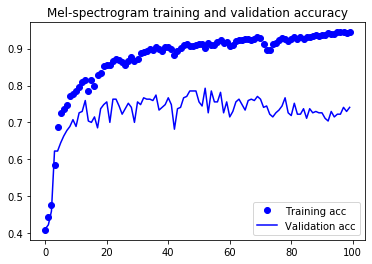

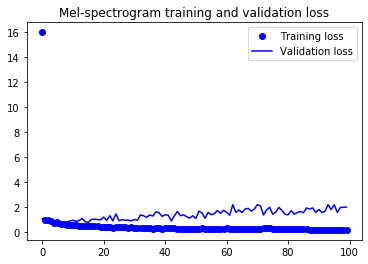

In [9]:
acc = melspec_history.history['accuracy']
val_acc = melspec_history.history['val_accuracy']
loss = melspec_history.history['loss']
val_loss = melspec_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Mel-spectrogram training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Mel-spectrogram training and validation loss')
plt.legend()

plt.show()

with open('modeldata/mel_spectrogram_history', 'wb') as fp:
    pickle.dump(melspec_history.history, fp)

Testing Mel-Spectogram Model - With Padding

In [10]:
test_melspec_ex = np.expand_dims(test_mel_spectrograms, -1)
test_loss, test_acc = melspec_model.evaluate(test_melspec_ex, test_labels)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 3ms/step
2.535842865484732
0.699999988079071


Demo 1

Adding new trained plot into saved plot with 100 epochs.

In [14]:
old_melspec_model = load_model('modeldata/mel_spectrogram_model.h5')

with open('modeldata/mel_spectrogram_history', 'rb') as fp: # loading old history 
    old_melspec_history = pickle.load(fp)

new_melspec_history = old_melspec_model.fit(train_melspec_ex,
          train_labels,
          epochs=20,
          batch_size=36,
          verbose=1,
          validation_data=(val_melspec_ex, val_labels))

old_melspec_history['loss'].extend(new_melspec_history.history['loss'])
old_melspec_history['accuracy'].extend(new_melspec_history.history['accuracy'])
old_melspec_history['val_loss'].extend(new_melspec_history.history['val_loss'])
old_melspec_history['val_accuracy'].extend(new_melspec_history.history['val_accuracy'])

acc = old_melspec_history['accuracy']
val_acc = old_melspec_history['val_accuracy']
loss = old_melspec_history['loss']
val_loss = old_melspec_history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Mel-Spectrogram Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Mel-Spectrogram Training and Validation Loss')
plt.legend()

plt.show()

Train on 2160 samples, validate on 270 samples
Epoch 1/10
 756/2160 [=========>....................] - ETA: 24s - loss: 2.0397e-04 - accuracy: 1.0000

KeyboardInterrupt: 

In [10]:
test_melspec_ex = np.expand_dims(test_mel_spectrograms, -1)
test_loss, test_acc = oldmelspec_model.evaluate(test_melspec_ex, test_labels)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 3ms/step
2.535842865484732
0.699999988079071


Initialize Per Channel Mel-Spectrogram Training - With Padding

In [13]:
train_pcenmelspec_ex = np.expand_dims(train_pcenmel_spectrograms, -1)
val_pcenmelspec_ex = np.expand_dims(val_pcenmel_spectrograms, -1)
print('train X shape:', train_pcenmelspec_ex.shape)
print('val X shape:', val_pcenmelspec_ex.shape)

train X shape: (2160, 128, 128, 1)
val X shape: (270, 128, 128, 1)


Initialize Per Channel Mel-Spectrogram Model - With Padding

In [20]:
ip = Input(shape=train_pcenmelspec_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(3, activation='softmax')(m)

pcenmelspec_model = Model(input=ip, output=op)

pcenmelspec_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1968160   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Training Per Channel Mel-Spectrogram Model - With Padding

In [21]:
pcenmelspec_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

pcenmelspec_history = pcenmelspec_model.fit(train_pcenmelspec_ex,
          train_labels,
          epochs=100,
          batch_size=36,
          verbose=1,
          validation_data=(val_pcenmelspec_ex, val_labels))

Train on 2160 samples, validate on 270 samples
Epoch 1/100
2160/2160 [==============================] - 19s 9ms/step - loss: 1.0286 - accuracy: 0.4569 - val_loss: 0.8709 - val_accuracy: 0.5741
Epoch 2/100
2160/2160 [==============================] - 19s 9ms/step - loss: 0.7406 - accuracy: 0.6370 - val_loss: 0.7470 - val_accuracy: 0.6037
Epoch 3/100
2160/2160 [==============================] - 19s 9ms/step - loss: 0.5697 - accuracy: 0.7412 - val_loss: 0.6829 - val_accuracy: 0.6815
Epoch 4/100
2160/2160 [==============================] - 19s 9ms/step - loss: 0.4530 - accuracy: 0.8023 - val_loss: 0.6280 - val_accuracy: 0.7111
Epoch 5/100
2160/2160 [==============================] - 19s 9ms/step - loss: 0.3187 - accuracy: 0.8810 - val_loss: 0.5937 - val_accuracy: 0.7481
Epoch 6/100
2160/2160 [==============================] - 19s 9ms/step - loss: 0.2160 - accuracy: 0.9278 - val_loss: 0.5407 - val_accuracy: 0.7667
Epoch 7/100
2160/2160 [==============================] - 19s 9ms/step - loss:

Epoch 56/100
2160/2160 [==============================] - 23s 11ms/step - loss: 3.5893e-04 - accuracy: 1.0000 - val_loss: 1.0714 - val_accuracy: 0.7963
Epoch 57/100
2160/2160 [==============================] - 25s 11ms/step - loss: 4.4933e-04 - accuracy: 1.0000 - val_loss: 1.0948 - val_accuracy: 0.7741
Epoch 58/100
2160/2160 [==============================] - 24s 11ms/step - loss: 3.6536e-04 - accuracy: 1.0000 - val_loss: 1.0742 - val_accuracy: 0.7889
Epoch 59/100
2160/2160 [==============================] - 24s 11ms/step - loss: 3.6807e-04 - accuracy: 1.0000 - val_loss: 1.1053 - val_accuracy: 0.7815
Epoch 60/100
2160/2160 [==============================] - 23s 10ms/step - loss: 3.6284e-04 - accuracy: 1.0000 - val_loss: 1.0850 - val_accuracy: 0.7852
Epoch 61/100
2160/2160 [==============================] - 23s 11ms/step - loss: 3.3150e-04 - accuracy: 1.0000 - val_loss: 1.1034 - val_accuracy: 0.7926
Epoch 62/100
2160/2160 [==============================] - 24s 11ms/step - loss: 3.5148e-

Saving Per Channel Mel-Spectrogram Model - With Padding

In [22]:
pcenmelspec_model.save('modeldata/pcenmel_spectrogram_model.h5')

Plotting Per Channel Mel-Spectrogram Model Result - With Padding

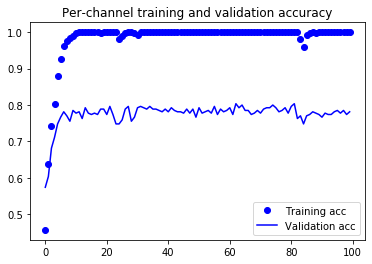

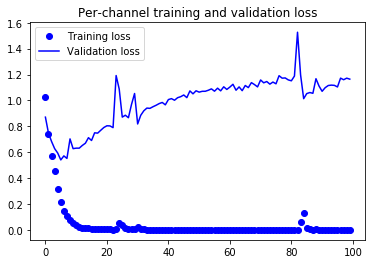

In [23]:
acc = pcenmelspec_history.history['accuracy']
val_acc = pcenmelspec_history.history['val_accuracy']
loss = pcenmelspec_history.history['loss']
val_loss = pcenmelspec_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Per-channel training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Per-channel training and validation loss')
plt.legend()

plt.show()

with open('modeldata/pcenmel_spectrogram_history', 'wb') as fp:
    pickle.dump(pcenmelspec_history.history, fp)

Testing Per Channel Mel-Spectogram Model - With Padding

In [24]:
test_pcenmelspec_ex = np.expand_dims(test_pcenmel_spectrograms, -1)
test_loss, test_acc = pcenmelspec_model.evaluate(test_pcenmelspec_ex, test_labels)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 4ms/step
1.6897127147074098
0.7259259223937988


Demo 2

Adding new trained plot into saved plot with 100 epochs.

Train on 2160 samples, validate on 270 samples
Epoch 1/20
2160/2160 [==============================] - 40s 19ms/step - loss: 3.3806e-04 - accuracy: 1.0000 - val_loss: 1.1853 - val_accuracy: 0.7778
Epoch 2/20
2160/2160 [==============================] - 18s 8ms/step - loss: 3.2556e-04 - accuracy: 1.0000 - val_loss: 1.1889 - val_accuracy: 0.7815
Epoch 3/20
2160/2160 [==============================] - 18s 8ms/step - loss: 3.1253e-04 - accuracy: 1.0000 - val_loss: 1.1907 - val_accuracy: 0.7741
Epoch 4/20
2160/2160 [==============================] - 18s 8ms/step - loss: 3.0943e-04 - accuracy: 1.0000 - val_loss: 1.1865 - val_accuracy: 0.7852
Epoch 5/20
2160/2160 [==============================] - 18s 8ms/step - loss: 3.0373e-04 - accuracy: 1.0000 - val_loss: 1.2264 - val_accuracy: 0.7778
Epoch 6/20
2160/2160 [==============================] - 19s 9ms/step - loss: 2.9483e-04 - accuracy: 1.0000 - val_loss: 1.2010 - val_accuracy: 0.7815
Epoch 7/20
2160/2160 [==============================] - 19

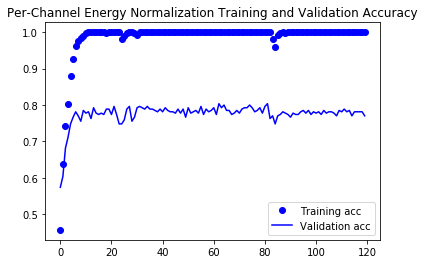

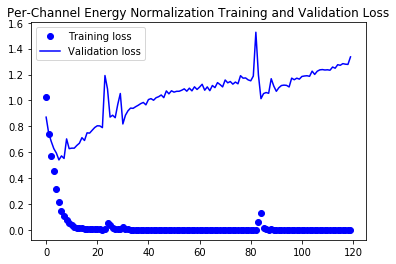

In [22]:
old_pcenmelspec_model = load_model('modeldata/pcenmel_spectrogram_model.h5')

with open('modeldata/pcenmel_spectrogram_history', 'rb') as fp: # loading old history 
    old_pcenmelspec_history = pickle.load(fp)

new_pcenmelspec_history = old_pcenmelspec_model.fit(train_pcenmelspec_ex,
          train_labels,
          epochs=20,
          batch_size=36,
          verbose=1,
          validation_data=(val_pcenmelspec_ex, val_labels))

old_pcenmelspec_history['loss'].extend(new_pcenmelspec_history.history['loss'])
old_pcenmelspec_history['accuracy'].extend(new_pcenmelspec_history.history['accuracy'])
old_pcenmelspec_history['val_loss'].extend(new_pcenmelspec_history.history['val_loss'])
old_pcenmelspec_history['val_accuracy'].extend(new_pcenmelspec_history.history['val_accuracy'])

acc = old_pcenmelspec_history['accuracy']
val_acc = old_pcenmelspec_history['val_accuracy']
loss = old_pcenmelspec_history['loss']
val_loss = old_pcenmelspec_history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Per-Channel Energy Normalization Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Per-Channel Energy Normalization Training and Validation Loss')
plt.legend()

plt.show()

In [24]:
test_pcenmelspec_ex = np.expand_dims(test_pcenmel_spectrograms, -1)
test_loss, test_acc = old_pcenmelspec_model.evaluate(test_pcenmelspec_ex, test_labels)
print(test_loss)
print(test_acc)

270/270 [==============================] - 1s 5ms/step
1.792222887498361
0.7333333492279053
